# Investigate 2019 Traffic Count Data

Date: Jan 16, 2020

In [150]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
atlasdir = "S:/AdminGroups/PerformanceProgramming/RegionalTransportationPerformanceMeasures/KeyDatasets/IDOTExpresswayAtlasData/2019/"

### Get detector IDS of count stations
There are 196 count stations.

In [3]:
df = pd.read_csv(atlasdir + "2019_grouped_files/lookup_aadt_no0_blanks.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'expressway', 'loc1', 'type1', 'id', 'direction', 'type2',
       'location1', 'detectorid2', 'aadt', 'aadt18', 'aadt19'],
      dtype='object')

In [5]:
df.type1.value_counts()

1EXIT    283
1ENT     199
*ENT      95
3LCS      92
4LCS      37
2EXIT     34
5LCS      25
2LCS      25
2ENT      16
3EXIT      4
3ENT       1
Name: type1, dtype: int64

In [6]:
countlist = ['3LCS','4LCS','2LCS','5LCS']

In [7]:
idlist = [x for x in (df[(df.type1.isin(countlist)) | (df.type2.isin(countlist))]).detectorid2]

In [8]:
len(idlist)

196

### How do counts look for each date across sensors?
Summary: Most sensors in this group have the same number of counts for each day.  Daily counts range from 15 - 5265, with most days at or around 4296. <br>
Date of concern include: <br>
* mean less than 1000: 1/17, 2/3, 4/30
* mean between 1000-3000: 2/1, 4/11, 5/1, 6/30, 10/21
* min less than 2000 (mean ok): only one sensor is off - 9900 on 8/12, 8/15, 8/19, and 6161 on 8/13, 8/20

In [9]:
dowdate = pd.read_csv(atlasdir + "2019_grouped_files/dow_date.csv")

In [10]:
forplot = dowdate[dowdate['DetectorId'].isin(idlist)].groupby('date').agg({'DetectorId1':['mean','max','min','count']}).reset_index()

In [11]:
forplot = forplot.droplevel(0,axis=1)

In [129]:
forplot.head()

,date,mean,max,min,count
0,2019-01-17,15.0,15,15,189
1,2019-01-18,4296.0,4296,4296,189
2,2019-01-19,4296.0,4296,4296,189
3,2019-01-20,4295.0,4295,4295,189
4,2019-01-21,4296.0,4296,4296,189


In [127]:
forplot['count'].describe()
# All count stations have data for every day in the dataset

count    267.000000
mean     188.157303
std        0.364770
min      188.000000
25%      188.000000
50%      188.000000
75%      188.000000
max      189.000000
Name: count, dtype: float64

In [13]:
forplot.rename({'':'date'},axis=1,inplace=True)

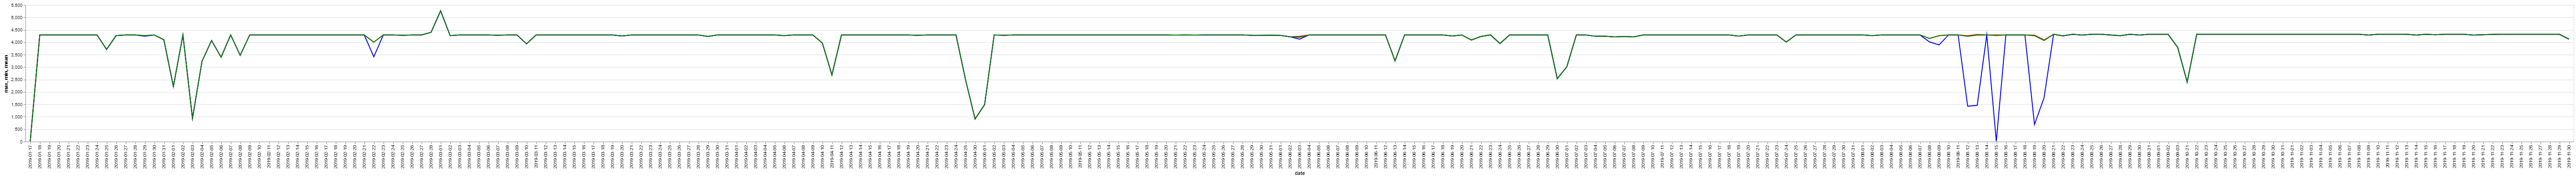

In [128]:
# CHART - for all the dates with data, this chart shows
# blue - the minimum number of observations (e.g., one or more stations only had 1000 counts for this day)
# green - the average number of observations (e.g., on average, stations had 4000 counts this day)
# red - the maximum number of observations (e.g., one or more stations had 5000 counts this day)
# !note that dates are missing data altogether and the time interval between points is not always one day!

source = forplot

base = alt.Chart(source)

mean = base.mark_line().encode(
    x='date',
    y='mean',
    color=alt.value('green'),
    tooltip=['date','mean']
).interactive()

maxline = base.mark_line().encode(
x='date',
y='max',
color=alt.value('red'))

minline = base.mark_line().encode(
    x='date',
    y='min',
    color=alt.value('blue'),
    tooltip=['date','min']
).interactive()

maxline + minline + mean

In [130]:
# how many sensors have issues on days with issues
LCSdow = dowdate[dowdate['DetectorId'].isin(idlist)]
LCSdow[(LCSdow['DetectorId1'] <= 3000)].groupby('date').agg({'DetectorId1':'count'})

,DetectorId1
date,
2019-01-17,189
2019-02-01,189
2019-02-03,189
2019-04-11,188
2019-04-25,188
2019-04-30,188
2019-05-01,188
2019-06-30,188
2019-08-12,2


In [29]:
# which sensor(s) are having issues in August?
LCSdow[(LCSdow['DetectorId1'] <= 2000) & (LCSdow['date'] >= '2019-08-11')]

,date,dow,DetectorId,volume,DetectorId1
333570,2019-08-12,0,9900,20414.0,1428
334873,2019-08-13,1,6161,18722.0,1462
338520,2019-08-15,3,9900,361.0,15
345089,2019-08-19,0,9900,12504.0,691
346393,2019-08-20,1,6161,11168.0,1760


### How do volumes look for low count dates?
1/17, 2/3, 4/30, 5/1 volumes are especially low

In [49]:
lowdates = ['2019-01-17','2019-02-03','2019-04-30','2019-02-01','2019-04-11','2019-05-01','2019-06-30','2019-10-21']

In [50]:
LCSdow[LCSdow['date'].isin(lowdates)].groupby('date').volume.describe()

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2019-01-17,189.0,1.049814e+04,1.430021e+05,0.0,42.00,81.0,120.00,1966050.0
2019-02-01,189.0,1.566395e+06,2.119214e+07,0.0,15658.00,25475.0,32962.00,291368610.0
2019-02-03,189.0,6.633876e+05,8.961065e+06,0.0,6114.00,11416.0,15372.00,123205800.0
2019-04-11,188.0,3.631104e+04,1.931149e+04,0.0,22293.50,36363.5,47623.50,94261.0
2019-04-30,188.0,3.556372e+03,2.441002e+03,0.0,1580.50,3287.5,5124.00,9804.0
2019-05-01,188.0,1.389689e+04,8.179942e+03,0.0,7617.75,13303.0,18873.75,37493.0
2019-06-30,188.0,2.827098e+04,1.674263e+04,0.0,15564.50,27380.5,36121.50,70246.0
2019-10-21,188.0,5.112748e+04,1.431211e+05,0.0,23240.00,35140.0,46978.25,1609652.0


### How do volumes look for sensors across all dates?

In [98]:
LCSdow.volume.describe()

count    5.023800e+04
mean     1.215402e+06
std      2.511740e+07
min      0.000000e+00
25%      3.239925e+04
50%      5.577550e+04
75%      7.518975e+04
max      6.900836e+08
Name: volume, dtype: float64

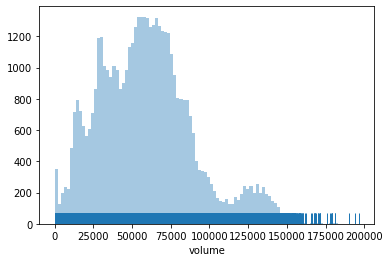

In [79]:
# filtering to less than 200,000 to keep useful scale.  values go all the way up to 690,083,600
sns.distplot(LCSdow[(LCSdow['volume'] < 200000) & (LCSdow['volume'] != 0)].volume, bins=100, rug=True, kde=False)

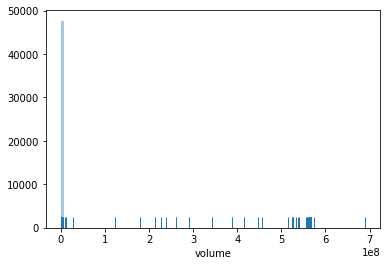

In [158]:
# what is looks like otherwise, 0 - 700,000,000
sns.distplot(LCSdow[(LCSdow['volume'] != 0)].volume, bins=100, rug=True, kde=False)

In [159]:
len(LCSdow[LCSdow['volume'] > 200000])

181

In [97]:
LCSdow.groupby('DetectorId').agg({'volume':'median'}).reset_index().sort_values('volume',ascending=False).head()

,DetectorId,volume
68,5085,138343.0
69,5086,138243.0
66,5083,138154.0
65,5082,132258.0
64,5081,131858.0


### Boxplots for every sensor
5199, 5302, 7901, 59997 have some very high outliers

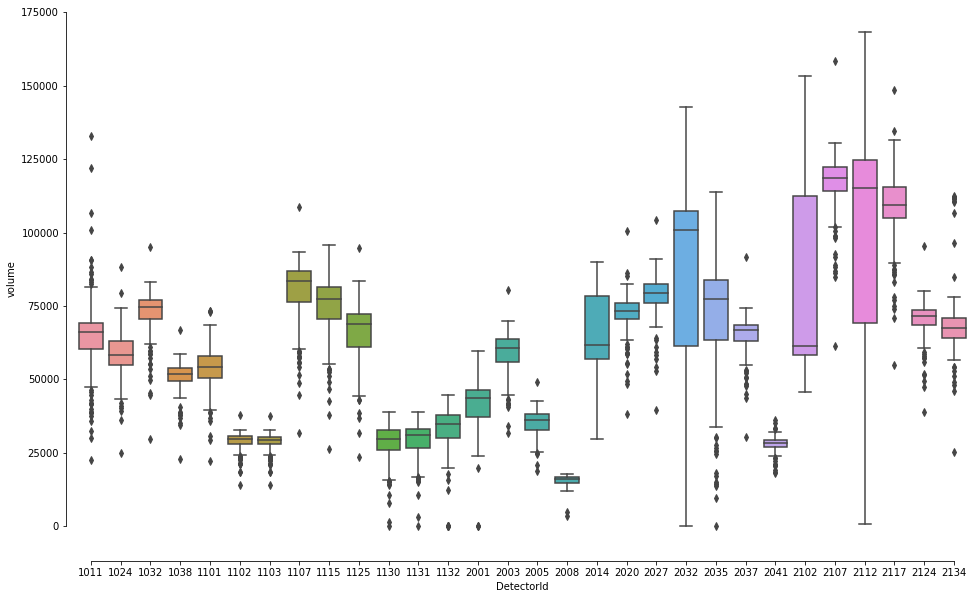

In [110]:
plt.figure(figsize=(16, 10))

sns.boxplot(x="DetectorId", y="volume",
            data=LCSdow[(LCSdow['DetectorId'].isin(idlist[0:30])) & (LCSdow['volume'] != 0) & (~LCSdow['date'].isin(lowdates))])
sns.despine(offset=10, trim=True)

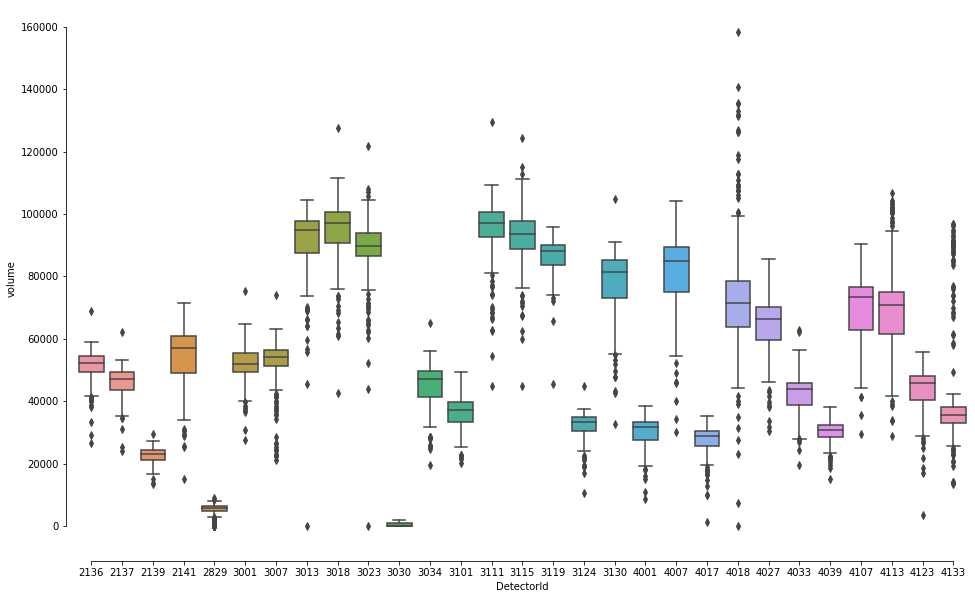

In [111]:
plt.figure(figsize=(16, 10))

sns.boxplot(x="DetectorId", y="volume",
            data=LCSdow[(LCSdow['DetectorId'].isin(idlist[31:60])) & (LCSdow['volume'] != 0) & (~LCSdow['date'].isin(lowdates))])
sns.despine(offset=10, trim=True)

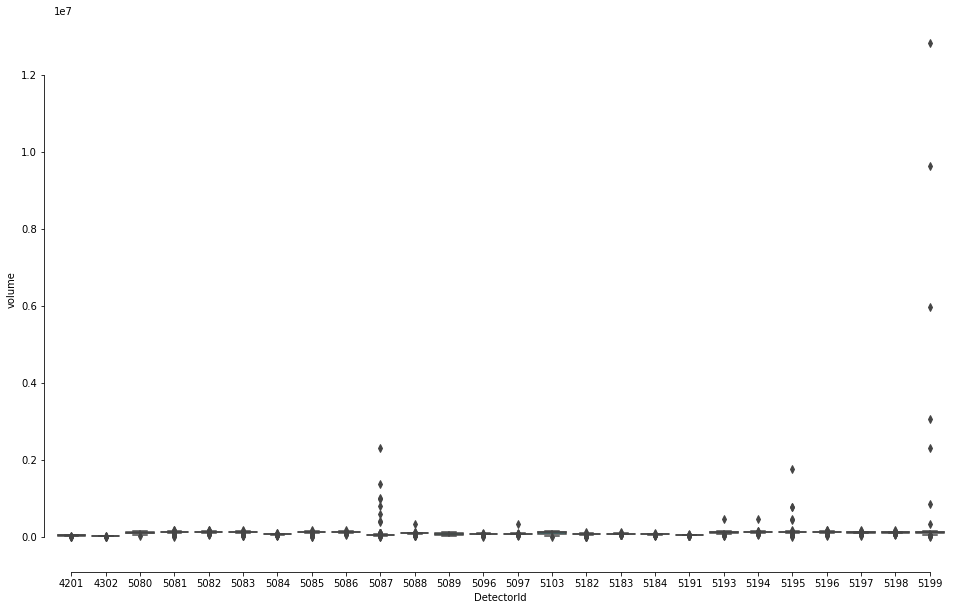

In [112]:
plt.figure(figsize=(16, 10))

sns.boxplot(x="DetectorId", y="volume",
            data=LCSdow[(LCSdow['DetectorId'].isin(idlist[61:90])) & (LCSdow['volume'] != 0) & (~LCSdow['date'].isin(lowdates))])
sns.despine(offset=10, trim=True)

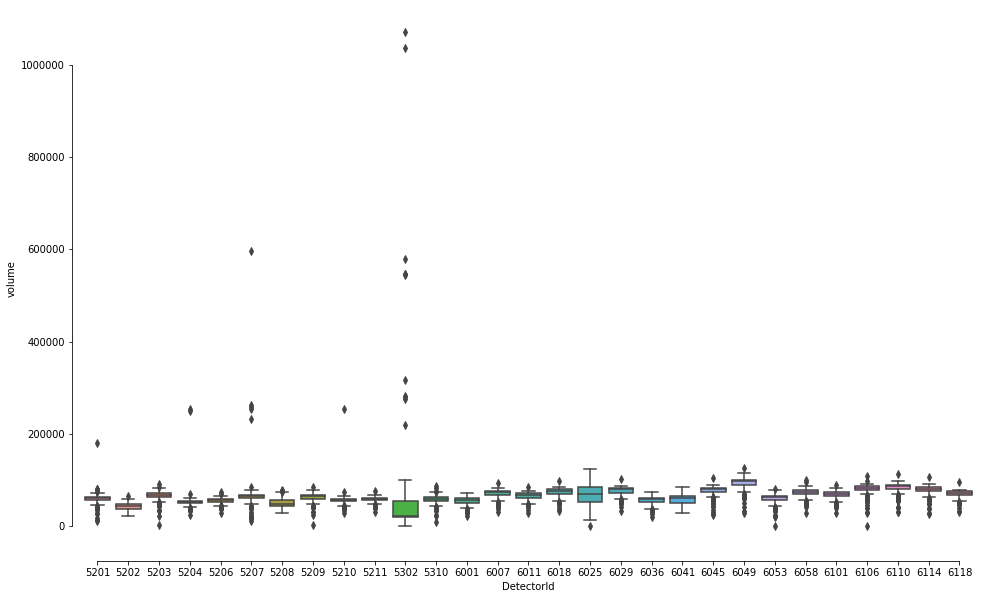

In [113]:
plt.figure(figsize=(16, 10))

sns.boxplot(x="DetectorId", y="volume",
            data=LCSdow[(LCSdow['DetectorId'].isin(idlist[91:120])) & (LCSdow['volume'] != 0) & (~LCSdow['date'].isin(lowdates))])
sns.despine(offset=10, trim=True)

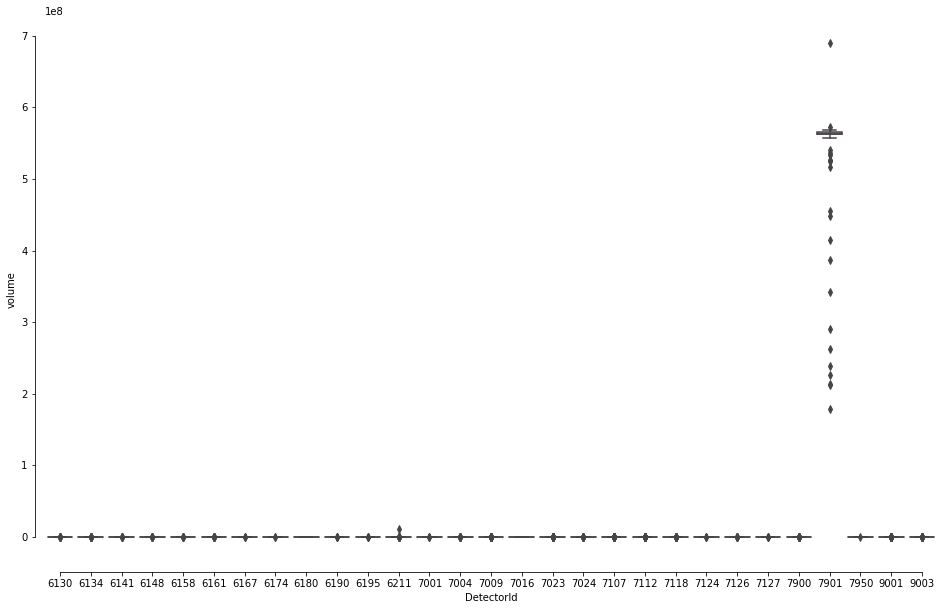

In [116]:
plt.figure(figsize=(16, 10))

sns.boxplot(x="DetectorId", y="volume",
            data=LCSdow[(LCSdow['DetectorId'].isin(idlist[121:150])) & (LCSdow['volume'] != 0) & (~LCSdow['date'].isin(lowdates))])
sns.despine(offset=10, trim=True)

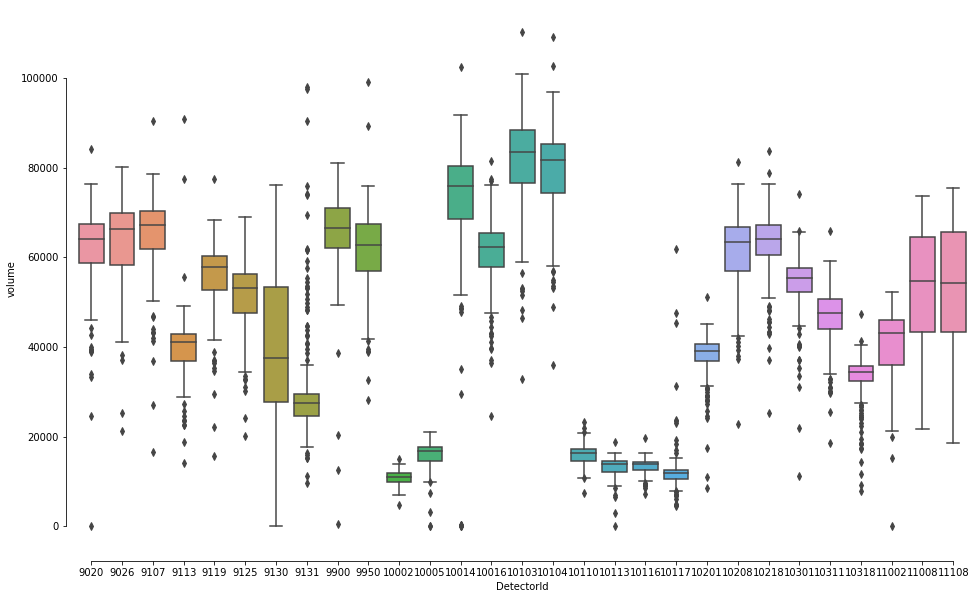

In [117]:
plt.figure(figsize=(16, 10))

sns.boxplot(x="DetectorId", y="volume",
            data=LCSdow[(LCSdow['DetectorId'].isin(idlist[151:180])) & (LCSdow['volume'] != 0) & (~LCSdow['date'].isin(lowdates))])
sns.despine(offset=10, trim=True)

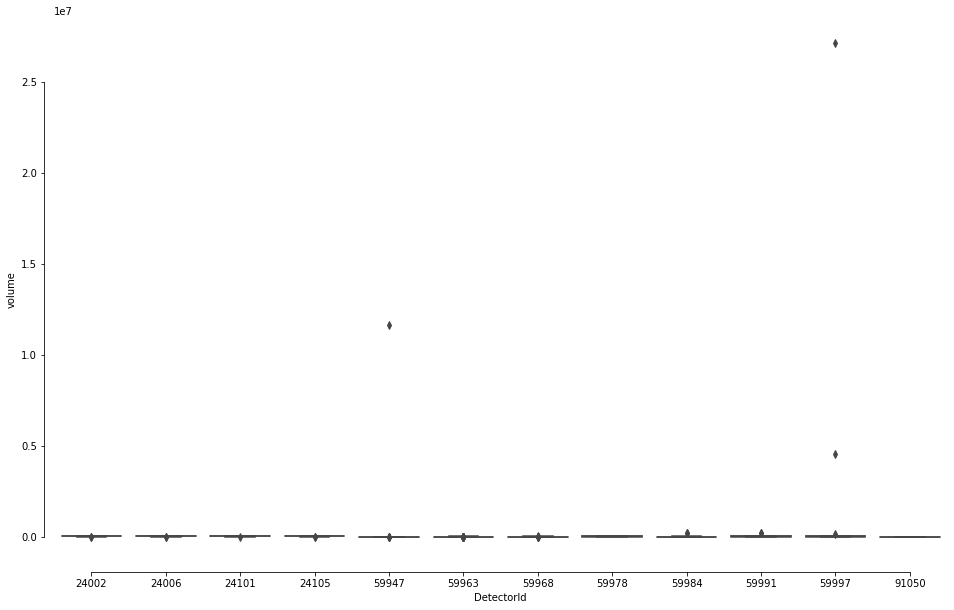

In [118]:
plt.figure(figsize=(16, 10))

sns.boxplot(x="DetectorId", y="volume",
            data=LCSdow[(LCSdow['DetectorId'].isin(idlist[181:210])) & (LCSdow['volume'] != 0) & (~LCSdow['date'].isin(lowdates))])
sns.despine(offset=10, trim=True)

### High Values
7901 dwarfs all the others

In [131]:
LCSdow[LCSdow['DetectorId'].isin([5199,5302,7901,59997])].sort_values('volume',ascending=False).head(10)

,date,dow,DetectorId,volume,DetectorId1
71650,2019-03-01,4,7901,690083550.0,5265
70015,2019-02-28,3,7901,573038040.0,4401
412769,2019-11-15,4,7901,568188450.0,4320
397883,2019-11-06,2,7901,568188450.0,4320
12649,2019-01-24,3,7901,566877750.0,4296
399537,2019-11-07,3,7901,566222400.0,4320
435925,2019-11-29,4,7901,566222400.0,4320
426001,2019-11-23,5,7901,566222400.0,4320
391267,2019-11-02,5,7901,566222400.0,4320
430963,2019-11-26,1,7901,566222400.0,4320


In [154]:
LCSdow['DetectorIdstring'] = LCSdow['DetectorId'].astype('str')

C:\Users\sbuchhorn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


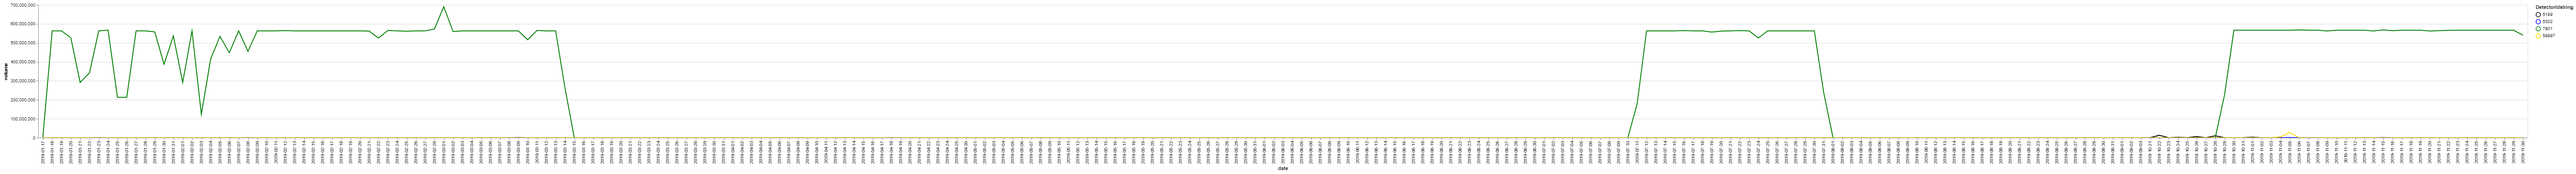

In [155]:
# CHART - time series for the four high volume sensors (legend all the way to right)
# !note that dates are missing data altogether and the time interval between points is not always one day!

source = LCSdow[LCSdow['DetectorIdstring'].isin(['5199','5302','7901','59997'])]

base = alt.Chart(source)

mean = base.mark_line().encode(
    color=alt.Color('DetectorIdstring',scale=alt.Scale(domain=['5199', '5302', '7901', '59997'],
                                   range=['black','blue','green','gold'])),
    x='date',
    y='volume',
    tooltip=['date','volume','DetectorId']
).interactive()

mean

In [156]:
# where?
df[df['detectorid2'] == 7901]

,Unnamed: 0,expressway,loc1,type1,id,direction,type2,location1,detectorid2,aadt,aadt18,aadt19
637,1132,BISHOP FORD,MICH,2LCS,01610094W51056,W,2LCS,MICH,7901.0,48400.0,0.0,523586900.0
